In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdena')

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_blobs, make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)
#мы переименовываем классы в "blue" и "red" для удобстава
y_named = np.array(['blue', 'red'])[y]
# мы можем вызвать train_test_split с любым количество массивов
# все будут разбиты одинаковым образом
X_train,X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X, y_named, y, random_state=0)
# строим модель гнрадиентного буста
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [4]:
print ("Форма массива X_test: {}".format(X_test.shape))
print ("Форма решающей функции: {}".format(gbrt.decision_function(X_test).shape))


Форма массива X_test: (25, 2)
Форма решающей функции: (25,)


In [5]:
# выведем нескольок первых элементов решающей функции
print ("Решающая функция:\n{}".format(gbrt.decision_function(X_test)[:6]))

Решающая функция:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [7]:
print ("Решающая функция с порогом отсечения:\n{}".format(gbrt.decision_function(X_test) > 0))
print ("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Решающая функция с порогом отсечения:
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Прогнозы:
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [8]:
# переделаем булевы значения true/False на 0 и 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# использеум 0 и 1 в качестве индексов атрибута classes_
pred = gbrt.classes_[greater_zero]
# pred идентичен выводу gbrt.predict
print ('pred идентичен прогнозам: {}'.format(np.all(pred == gbrt.predict(X_test))))

pred идентичен прогнозам: True


In [9]:
decision_function = gbrt.decision_function(X_test)
print ("Решабщая функция минимум: {:.2f} максимум: {:.2f}".format(np.min(decision_function), np.max(decision_function)))

Решабщая функция минимум: -7.69 максимум: 4.29


C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


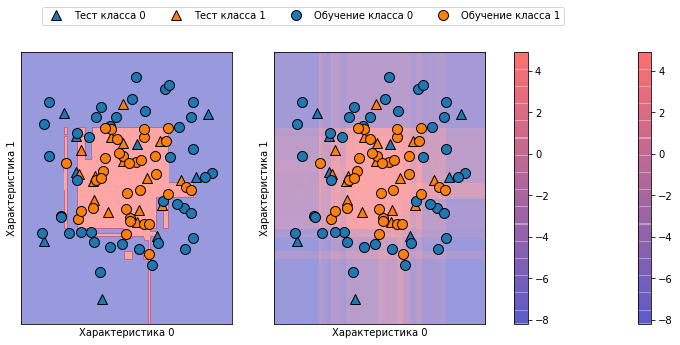

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Характеристика 0')
    ax.set_ylabel('Характеристика 1')
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(['Тест класса 0', "Тест класса 1", "Обучение класса 0", "Обучение класса 1"], ncol=4, loc=(.1, 1.1))

In [14]:
# выведм первые несколько элементов predict_proba
print ("Спрогнозированные вероятности:\n{}".format(gbrt.predict_proba(X_test[:6])))

Спрогнозированные вероятности:
[[ 0.01573626  0.98426374]
 [ 0.84575649  0.15424351]
 [ 0.98112869  0.01887131]
 [ 0.97406775  0.02593225]
 [ 0.01352142  0.98647858]
 [ 0.02504637  0.97495363]]


C:\Sneg\Add.Program\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['Verdena'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


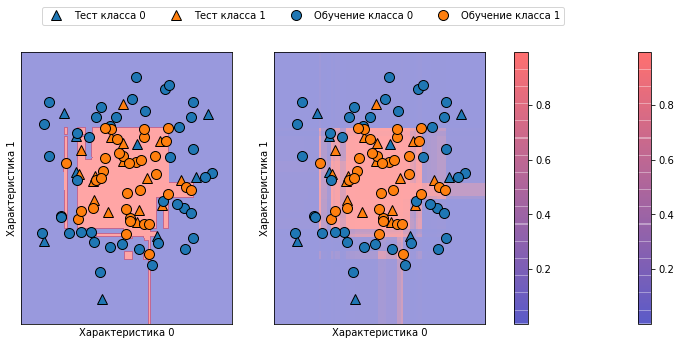

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1], alpha=.4, cm=mglearn.ReBl, function="predict_proba")

for ax in axes:
    # размещаем на графике точки обучающего и тестового набора
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, markers='o', ax=ax)
    ax.set_xlabel('Характеристика 0')
    ax.set_ylabel('Характеристика 1')
    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    axes[0].legend(['Тест класса 0', "Тест класса 1", "Обучение класса 0", "Обучение класса 1"], ncol=4, loc=(.1, 1.1))

# Неопределнность в мультиклассовой классификации

In [16]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [21]:
print ('Форма решающей функции: {}'.format(gbrt.decision_function(X_test).shape))
# выведем первые несколько элементов решающей функции
print ('Решающая функци:\n{}'.format(gbrt.decision_function(X_test)[:6, :]))

Форма решающей функции: (38, 3)
Решающая функци:
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [23]:
print ("Argmax решающей функции:\n{}".format(np.argmax(gbrt.decision_function(X_test), axis=1)))
print ("Прогнозы:\n{}".format(gbrt.predict(X_test)))

Argmax решающей функции:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Прогнозы:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
